In [2]:
#IMPORT ALL NECESSARY PACKAGES AT THE TOP OF THE CODE
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt


In [36]:
from IPython.display import Markdown

def md_print(md_str: str):
    display(Markdown(md_str))

def lax_print(equation):
    return sym.latex(equation , mode='inline')

In [51]:
# Question 1 code:

####################################
# Part 1: compute derivative of f

# Define symbols x and f
x = sym.symbols('x')
f = sym.sin(x)

# compute derivative of f
df = f.diff(x)

# Define v and epsilon
eps, v = sym.symbols(r'\epsilon, v')

# Add the directional V with epsilon to x.
new_f = sym.sin(x + v*eps)
# take derivative of the new function w.r.t. epsilon
df_eps = new_f.diff(eps)

# evaluate for eps=0
new_df = df_eps.subs(eps, 0)

md_print(
f"""
## Problem 1 Solution"

derivative of f: {lax_print(df)}

Directional Derivative of F with v is: {lax_print(df_eps)}

After subsitued with $\epsilon$ = 0 : {lax_print(new_df)}

""")


## Problem 1 Solution"

derivative of f: $\cos{\left(x \right)}$

Directional Derivative of F with v is: $v \cos{\left(\epsilon v + x \right)}$

After subsitued with $\epsilon$ = 0 : $v \cos{\left(x \right)}$



In [53]:
# Problem 2:

def integrate(func, xspan, step_size):
    '''
    Numerical integration with Euler's method

    Parameters:
    ====================
    func: Python function
        func is the function you want to integrate for
    xspan: list
        xspan is a list of two elements, representing
        the start and end of integration
    step_size:
        a smaller step_size will give a more accurate result

    Returns:
    int_val:
        result of the integration
    ====================
    '''
    x = np.arange(xspan[0], xspan[1], step_size)
    int_val = 0
    for xi in x:
        int_val += func(xi) * step_size
    return int_val

# The actual f of t to evalue against 
def p2_f_t(t):
  return 0.5 * np.cos(t) * np.cos(t) # Didn't bother to import math here
p2_answer = integrate(func=p2_f_t, xspan=[0, np.pi/2], step_size=0.005)
md_print(f"""
## Problem 2 Answer

**Integred result from numercial {p2_answer:.6f}**
""")



## Problem 2 Answer

**Integred result from numercial 0.393949**


In [5]:
# Problem 3 numerical integration part

# This cell depends on problem 2's cell for integrate function
# Problem 3 Solve by numerical

def J_of_t (t:float):
    return 2* np.cos(t) * np.sin(t)

# Integrate function is from problem2.
p3_result = integrate(J_of_t,[0,np.pi/2] , step_size=0.01) * 0.5

display(Markdown(f"**Problem 3 numerical result is {p3_result:.3f}**"))


**Problem 3 numerical result is 0.500**

In [58]:
# Problem 4

t = sym.symbols('t')
# Function x and v are function of t 
x = sym.Function('x')(t)

J = sym.integrate(0.5*x**2 , [t,0,sym.pi/2])

display(J)

# Now we plug in the v and eps 
v = sym.Function('v')(t)
eps = sym.symbols(r'\epsilon')

new_J = sym.integrate(0.5*(x+eps*v)**2 , [t,0,sym.pi/2] )
print(f"J(x(t) + eps* v(t))")
display(new_J)

# Now we plugin x(t) = cos(t) v(t) = sin(t) 
J_subed = new_J.subs([(x,sym.cos(t)), (v,sym.sin(t))])

print(f"J after pluging in x=cos(t) v = sin(t)")
display(J_subed)

# Take diff wrt eps then subsitude for 0s 
print(f"J after taking deritative with respect to eps ")
dJdeps = J_subed.diff(eps)
dJdeps_subs = dJdeps.subs(eps , 0)
print("dJ / deps after subsituting eps = 0 ")
display(dJdeps_subs)

        
md_print(f"""
## Problem 4 answer
         
**Directional Derivative of J with $\epsilon$ =0 : {lax_print(dJdeps_subs)}**

**Evaluted to : {dJdeps_subs.evalf():.2f}** 
""")



0.5*Integral(x(t)**2, (t, 0, pi/2))

J(x(t) + eps* v(t))


0.5*Integral(\epsilon**2*v(t)**2, (t, 0, pi/2)) + 0.5*Integral(2*\epsilon*v(t)*x(t), (t, 0, pi/2)) + 0.5*Integral(x(t)**2, (t, 0, pi/2))

J after pluging in x=cos(t) v = sin(t)


0.5*Integral(\epsilon**2*sin(t)**2, (t, 0, pi/2)) + 0.5*Integral(2*\epsilon*sin(t)*cos(t), (t, 0, pi/2)) + 0.5*Integral(cos(t)**2, (t, 0, pi/2))

J after taking deritative with respect to eps 
dJ / deps after subsituting eps = 0 


0.5*Integral(0, (t, 0, pi/2)) + 0.5*Integral(2*sin(t)*cos(t), (t, 0, pi/2))


## Problem 4 answer
         
**Directional Derivative of J with $\epsilon$ =0 : $0.5 \int_{0}^{\pi / 2} 0\, dt + 0.5 \int_{0}^{\pi / 2} 2 \sin{\left(t \right)} \cos{\left(t \right)}\, dt$**

**Evaluted to : 0.50** 



## problem 5 Answer

**Equation for problem 5 $x y + \sin{\left(x \right)} = x + y$**

**Solved for Y: $\frac{x - \sin{\left(x \right)}}{x - 1}$**



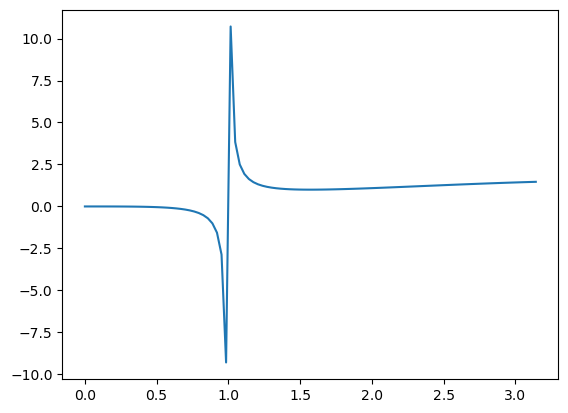

In [61]:
# Problem 5

# xy+sin(x)=x+y

x, y = sym.symbols(r'x,y')

p5_equation = sym.Eq(x * y + sym.sin(x), x + y)


# Return of solve is an array type, Incase of multiple solutions
p5_solved_y = sym.solve(p5_equation, y)[0]

p5_y_num = sym.lambdify(x, p5_solved_y)

x_list = np.linspace(0, np.pi, 100)

md_print(f"""
## problem 5 Answer

**Equation for problem 5 {lax_print(p5_equation)}**

**Solved for Y: {lax_print(p5_solved_y)}**

""")

plt.plot(x_list , p5_y_num(x_list))
plt.show()